Importing Libraries


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Data Loading and Analysis

In [2]:
df = pd.read_csv('/content/traffic.csv')
df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal


In [3]:
df.isnull().sum()

,0
Time,0
Date,0
Day of the week,0
CarCount,0
BikeCount,0
BusCount,0
TruckCount,0
Total,0
Traffic Situation,0


Data Visualization

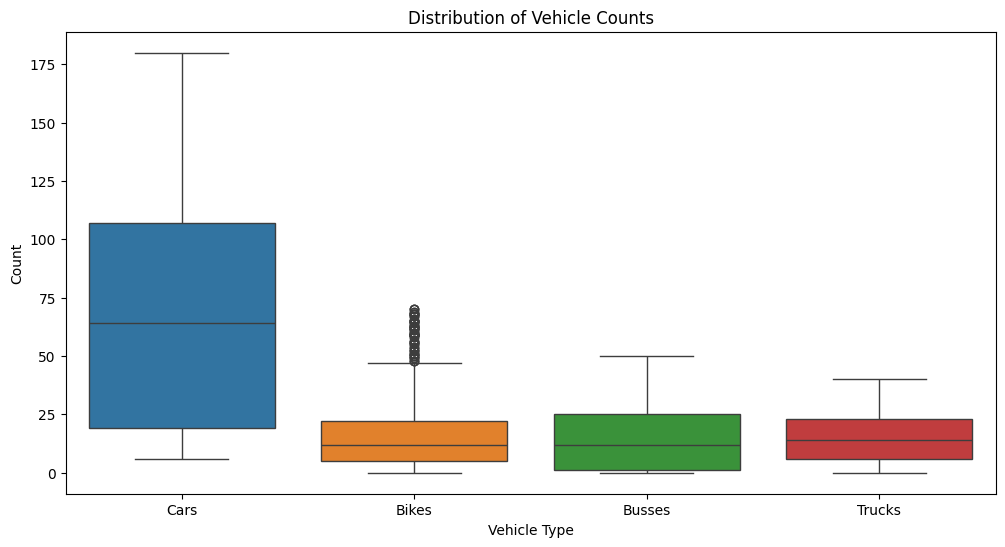

In [4]:


plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['CarCount', 'BikeCount', 'BusCount', 'TruckCount']])
plt.xticks([0, 1, 2, 3], ['Cars', 'Bikes', 'Busses', 'Trucks'])
plt.title('Distribution of Vehicle Counts')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.show()

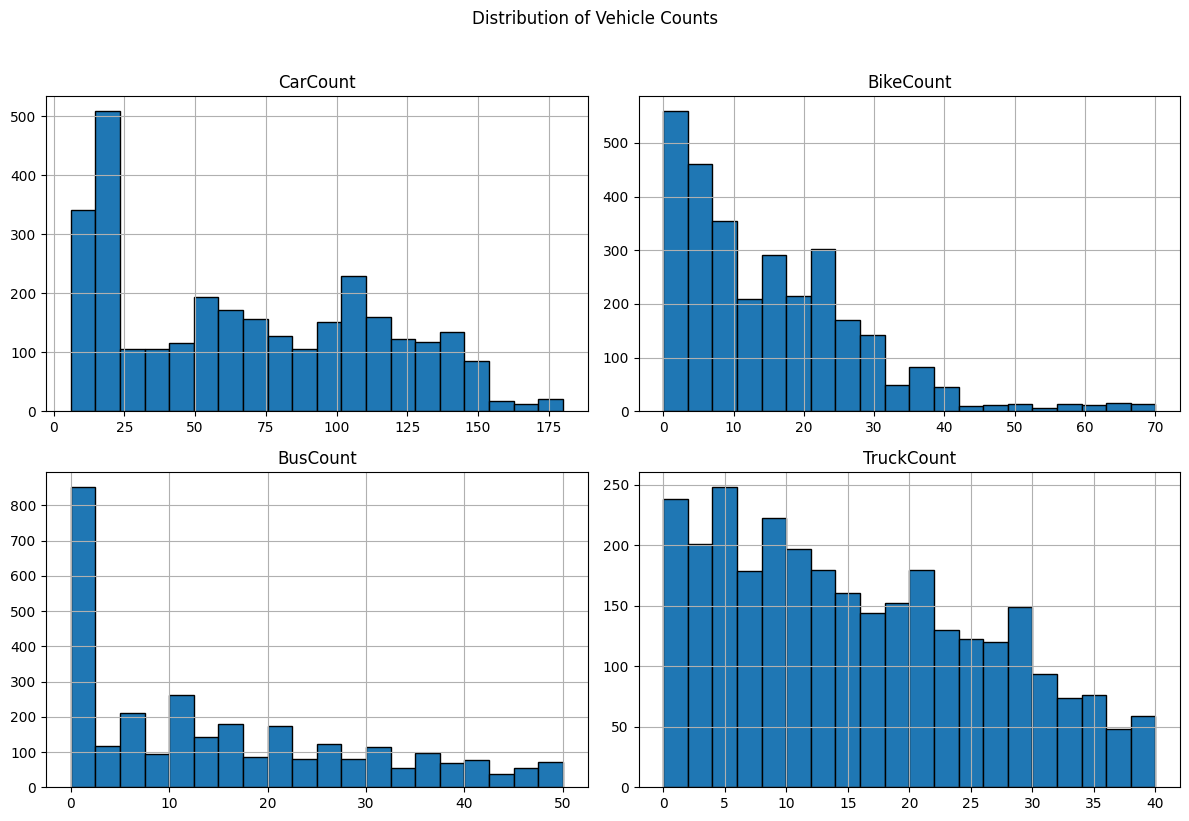

In [5]:
df[['CarCount', 'BikeCount', 'BusCount', 'TruckCount']].hist(
    bins=20,
    figsize=(12, 8),
    layout=(2, 2),
    edgecolor='black'
)
plt.suptitle('Distribution of Vehicle Counts', y=1.02)
plt.tight_layout()
plt.show()

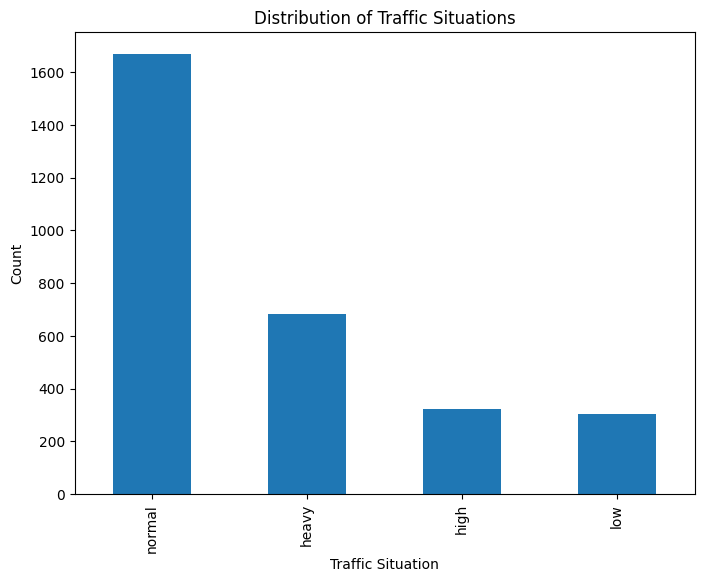

In [6]:
plt.figure(figsize=(8, 6))
df['Traffic Situation'].value_counts().plot(kind='bar')
plt.title('Distribution of Traffic Situations')
plt.xlabel('Traffic Situation')
plt.ylabel('Count')
plt.show()

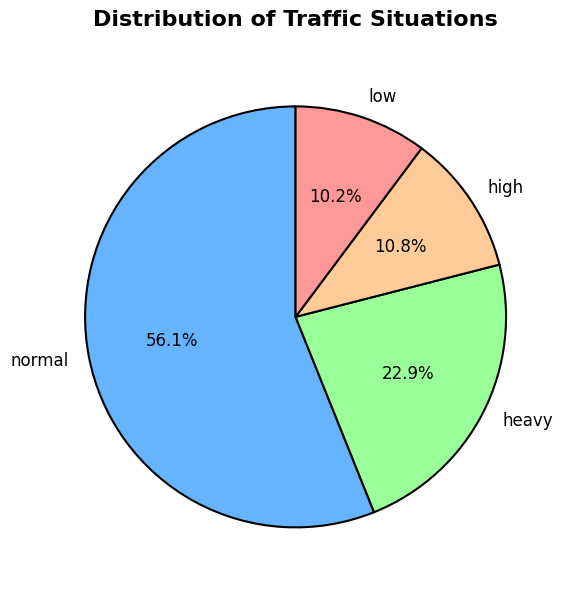

In [7]:
plt.figure(figsize=(8, 6))

df['Traffic Situation'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=['#66b3ff', '#99ff99', '#ffcc99', '#ff9999'],
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.5},
    textprops={'fontsize': 12, 'color': 'black'}
)
plt.title('Distribution of Traffic Situations', fontsize=16, fontweight='bold', pad=20)

plt.ylabel('')
plt.tight_layout()
plt.show()

<ipython-input-8-a58471def234>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])


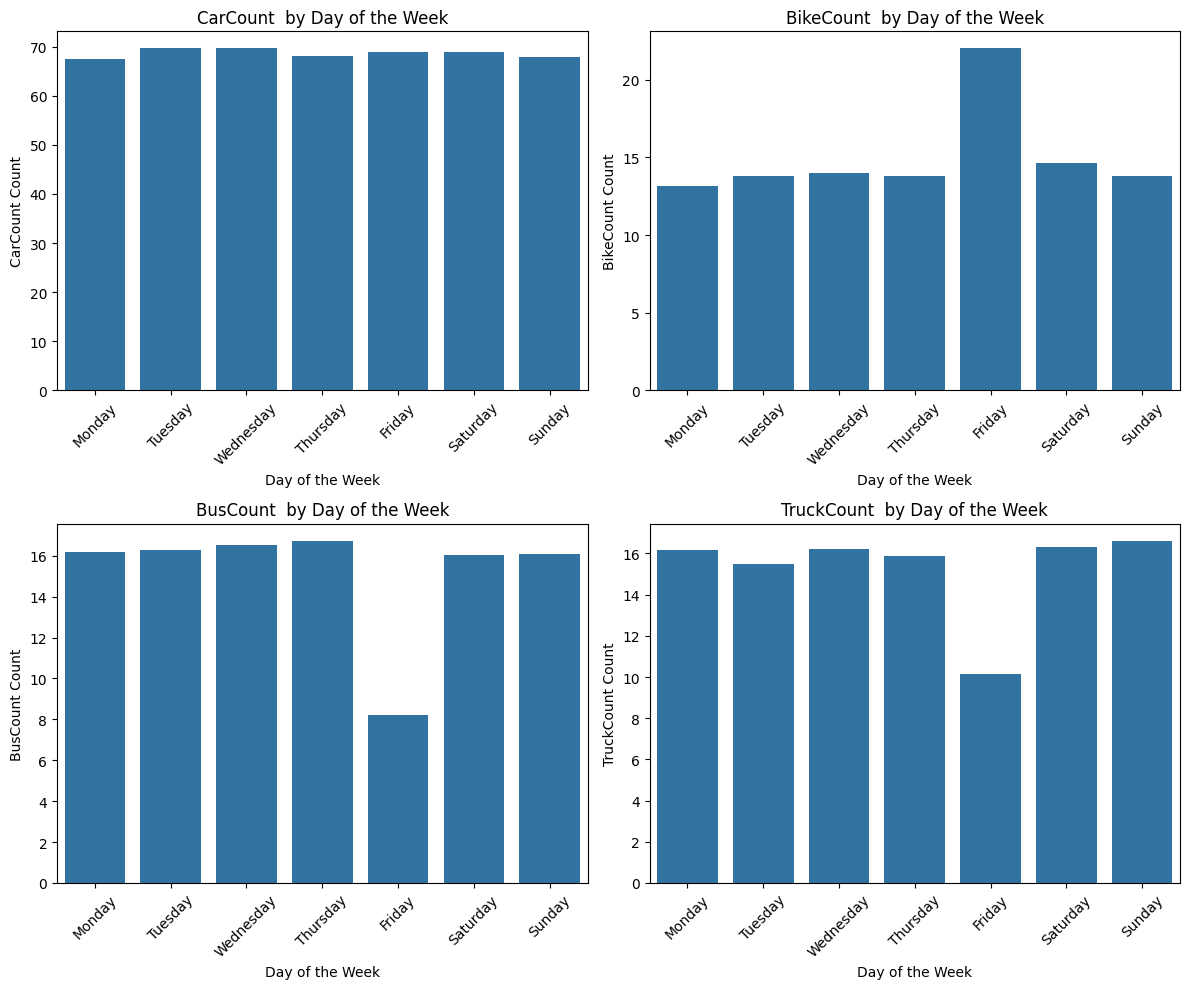

In [8]:
df['Time'] = pd.to_datetime(df['Time'])
df['Day of the Week'] = df['Time'].dt.day_name()
df['Hour'] = df['Time'].dt.hour

vehicles = ['CarCount', 'BikeCount', 'BusCount', 'TruckCount']
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, vehicle in enumerate(vehicles):
    row, col = i // 2, i % 2
    sns.barplot(x='Day of the week', y=vehicle, data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ax=axes[row, col], errorbar=None)
    axes[row, col].set_title(f'{vehicle}  by Day of the Week')
    axes[row, col].set_xlabel("Day of the Week")
    axes[row, col].set_ylabel(f"{vehicle} Count")
    axes[row, col].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

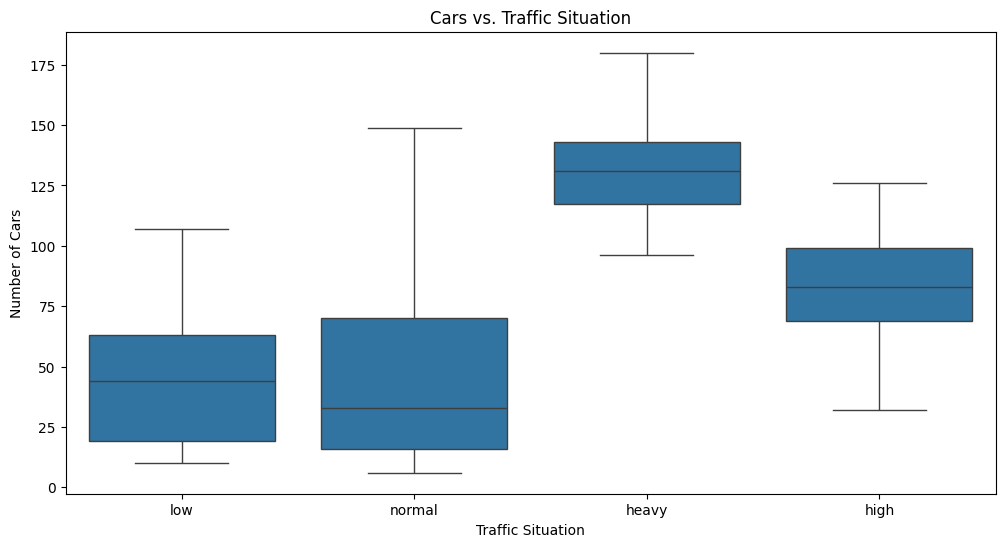

In [9]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Traffic Situation', y= 'CarCount' , data=df)
plt.title('Cars vs. Traffic Situation')
plt.ylabel('Number of Cars')
plt.show()

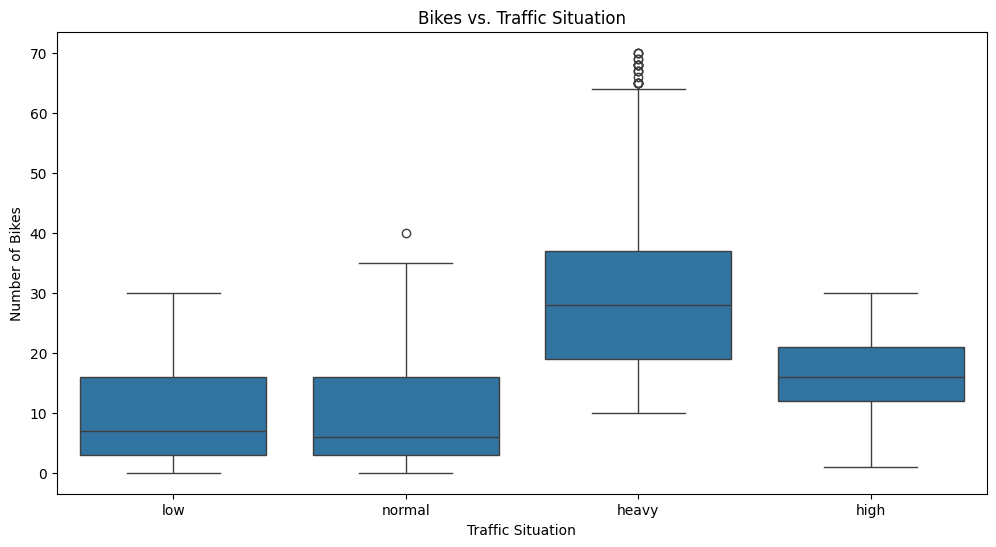

In [10]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Traffic Situation', y='BikeCount', data=df)
plt.title('Bikes vs. Traffic Situation')
plt.ylabel('Number of Bikes')
plt.show()

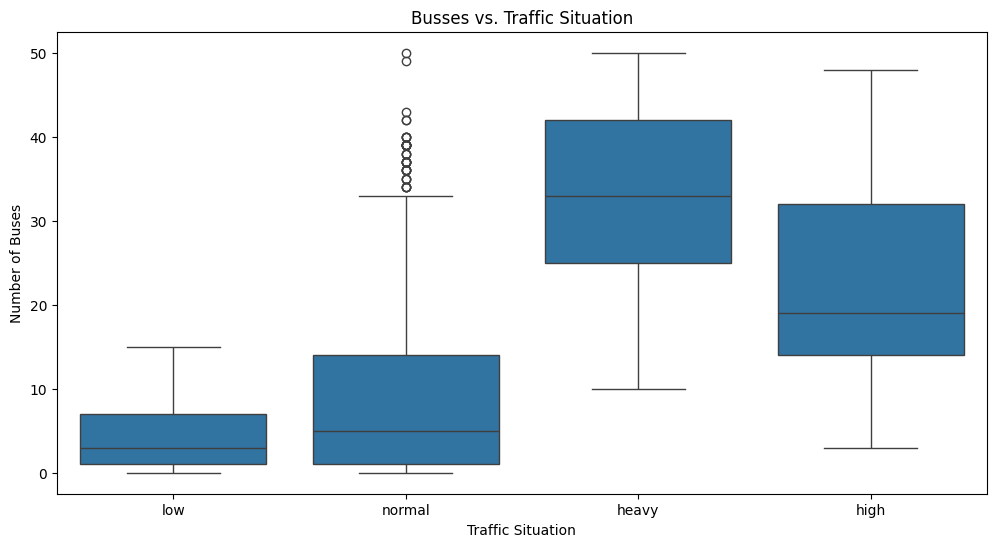

In [11]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Traffic Situation', y='BusCount', data=df)
plt.title('Busses vs. Traffic Situation')
plt.ylabel('Number of Buses')
plt.show()

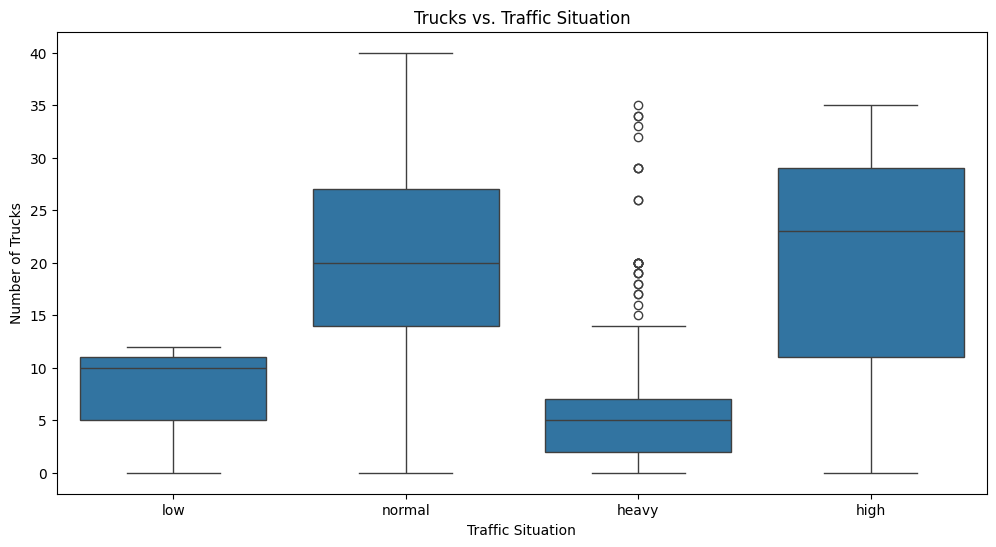

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Traffic Situation', y='TruckCount', data=df)
plt.title('Trucks vs. Traffic Situation')
plt.ylabel('Number of Trucks')
plt.show()

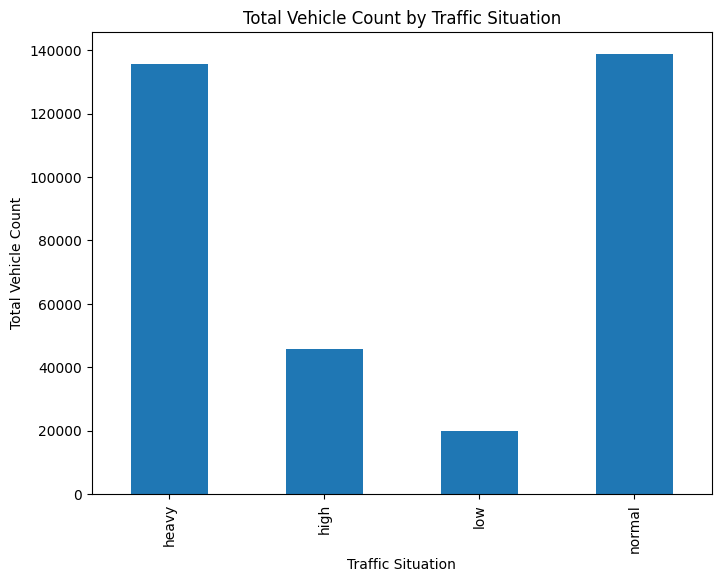

In [13]:
total_by_traffic = df.groupby('Traffic Situation')['Total'].sum()

plt.figure(figsize=(8, 6))
total_by_traffic.plot(kind='bar')
plt.title('Total Vehicle Count by Traffic Situation')
plt.xlabel('Traffic Situation')
plt.ylabel('Total Vehicle Count')
plt.show()

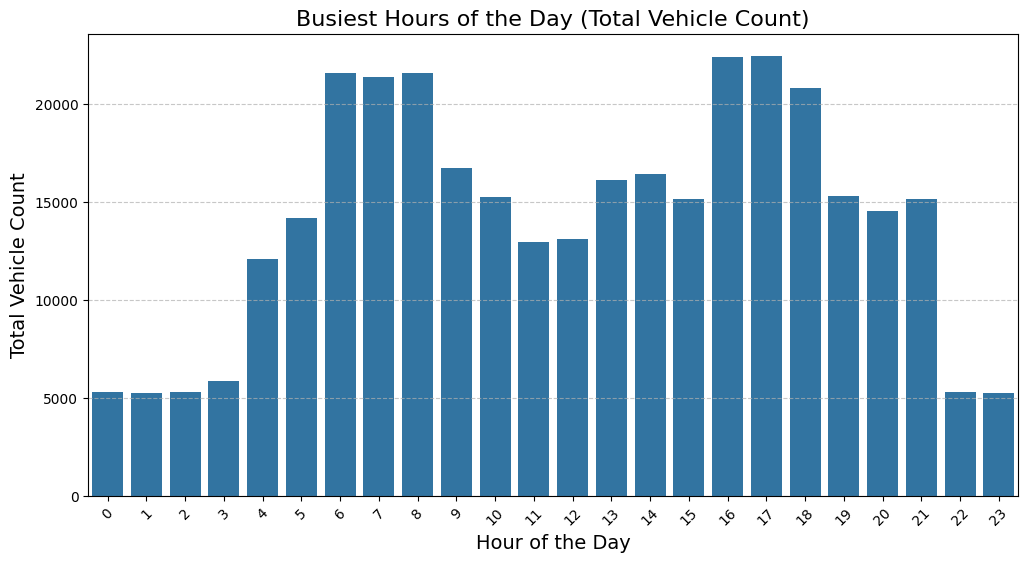

In [14]:
df['Hour'] = pd.to_datetime(df['Time']).dt.hour

total_by_hour = df.groupby('Hour')['Total'].sum()

plt.figure(figsize=(12, 6))
sns.barplot(x=total_by_hour.index, y=total_by_hour.values)
plt.title('Busiest Hours of the Day (Total Vehicle Count)', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Total Vehicle Count', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()